In [ ]:
import pandas as pd

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/adityajn105/flickr8k")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: wasimmmalik
Your Kaggle Key: ··········


100%|██████████| 1.04G/1.04G [00:47<00:00, 23.4MB/s]


In [ ]:
data = pd.read_csv("/content/flickr8k/captions.txt",delimiter  = ',')

In [ ]:
data.columns

Index(['image', 'caption'], dtype='object')

In [ ]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

In [ ]:
# extrat Features
def extract_features(directory):
    
    model = VGG16()
    
    #remove last layer
    model.layers.pop()
    
    model = Model(inputs = model.inputs , outputs = model.layers[-1].output)
    
    print(model.summary())
    
    features = dict()
    i = 0
    for name in listdir(directory):
        
        # load and image
        filename = directory + '/' + name
        print(f"counter -> {i} {name}")
        print(f"type {filename[-4:]}")
        i = i+1
        if name[-4:] != ".jpg":
          continue
        image = load_img(filename , target_size=(224 , 224))
        
        image = img_to_array(image)
        
        image = image.reshape((1 , image.shape[0] , image.shape[1] ,image.shape[2]))
        
        image = preprocess_input(image)
        
        feature = model.predict(image , verbose = 0)
        
        # get image id
        image_id = name.split(".")[0]
        
        # store features
        features[image_id] = feature
        
        print(name)
        
    return features

In [ ]:
directory = '/content/flickr8k/Images'
features = extract_features(directory)
print('extracted features :',len(features))
dump(features , open('features.pkl' , 'wb'))


Streaming output truncated to the last 5000 lines.
98377566_e4674d1ebd.jpg
counter -> 6425 2284894733_b710b9b106.jpg
type .jpg
2284894733_b710b9b106.jpg
counter -> 6426 3686078365_9e655e238f.jpg
type .jpg
3686078365_9e655e238f.jpg
counter -> 6427 2385146732_d1c67c790e.jpg
type .jpg
2385146732_d1c67c790e.jpg
counter -> 6428 2845691057_d4ab89d889.jpg
type .jpg
2845691057_d4ab89d889.jpg
counter -> 6429 3689355450_fd559b816d.jpg
type .jpg
3689355450_fd559b816d.jpg
counter -> 6430 2483792149_a9b4ffecec.jpg
type .jpg
2483792149_a9b4ffecec.jpg
counter -> 6431 3250076419_eb3de15063.jpg
type .jpg
3250076419_eb3de15063.jpg
counter -> 6432 2921112724_5cb85d7413.jpg
type .jpg
2921112724_5cb85d7413.jpg
counter -> 6433 3670918456_68631d362a.jpg
type .jpg
3670918456_68631d362a.jpg
counter -> 6434 2675190069_d5c3b2c876.jpg
type .jpg
2675190069_d5c3b2c876.jpg
counter -> 6435 447733067_09cfac3286.jpg
type .jpg
447733067_09cfac3286.jpg
counter -> 6436 3413571342_b9855795e2.jpg
type .jpg
3413571342_b98557

In [ ]:
import pandas as pd
import nltk
import re
from nltk.stem import WordNetLemmatizer

In [ ]:
lemma = WordNetLemmatizer()

def load_decriptions(doc):
    mapping = dict()
    
    for i in range(len(doc)):
        image_id = doc['image_id'][i]
        image_desc = doc['desc'][i]
        
        if image_id not in mapping:
            mapping[image_id] = list()
        
        mapping[image_id].append(image_desc)
        
    return mapping

def clean_text(desc):
    
    # clean punctuation
    desc = re.sub(r'[^\w\s]' ,'', desc)
    
    # tokenize the words
    desc = desc.split()
    
    # convert to lower case
    desc = [token.lower() for token in desc]
    
    # lemmatization
    desc = [lemma.lemmatize(token) for token in desc]
    
    # remove numerical values
    desc = [token for token in desc if token.isalpha()]
    
    # join whole token
    desc = ' '.join(desc)
    
    return desc

In [ ]:
# convert loaded descriptions into vocablury
def to_vocabluary(descriptions):
    all_desc = set()
    
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
        
    return all_desc

def save_descriptions(descriptions , filename):
    lines = list()
    
    for key , desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key +' '+ desc)
            
    data = '\n'.join(lines)
    file = open(filename , 'w')
    file.write(data)
    file.close()            

In [ ]:
descriptions = pd.read_csv("/content/flickr8k/captions.txt",delimiter  = ',')

In [ ]:
descriptions.columns = ['image_id','desc']

In [ ]:
import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
descriptions['desc'] = descriptions['desc'].apply(lambda x : clean_text(str(x)))

In [ ]:
descriptions

,image_id,desc
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e.jpg,a little girl climbing the stair to her playhouse
4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...
...,...,...
40450,997722733_0cb5439472.jpg,a man in a pink shirt climb a rock face
40451,997722733_0cb5439472.jpg,a man is rock climbing high in the air
40452,997722733_0cb5439472.jpg,a person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,a rock climber in a red shirt


In [ ]:
desc_map = load_decriptions(descriptions) # image name with Its captions

In [ ]:
desc_map

{'1000268201_693b08cb0e.jpg': ['a child in a pink dress is climbing up a set of stair in an entry way',
  'a girl going into a wooden building',
  'a little girl climbing into a wooden playhouse',
  'a little girl climbing the stair to her playhouse',
  'a little girl in a pink dress going into a wooden cabin'],
 '1001773457_577c3a7d70.jpg': ['a black dog and a spotted dog are fighting',
  'a black dog and a tricolored dog playing with each other on the road',
  'a black dog and a white dog with brown spot are staring at each other in the street',
  'two dog of different breed looking at each other on the road',
  'two dog on pavement moving toward each other'],
 '1002674143_1b742ab4b8.jpg': ['a little girl covered in paint sits in front of a painted rainbow with her hand in a bowl',
  'a little girl is sitting in front of a large painted rainbow',
  'a small girl in the grass play with fingerpaint in front of a white canvas with a rainbow on it',
  'there is a girl with pigtail sittin

In [ ]:
vocabulary = to_vocabluary(desc_map)

In [ ]:
vocabulary

{'moss',
 'passifier',
 'turquiose',
 'crewman',
 'squat',
 'dodging',
 'slip',
 'grid',
 'clack',
 'buffet',
 'french',
 'or',
 'wintry',
 'grotto',
 'pocket',
 'fastfood',
 'tournament',
 'zooming',
 'shopper',
 'shoreline',
 'dad',
 'at',
 'conference',
 'motorist',
 'headline',
 'exhibit',
 'investigate',
 'same',
 'tank',
 'humping',
 'end',
 'lipstick',
 'frilly',
 'bikini',
 'rafting',
 'wuth',
 'amphitheater',
 'fisherman',
 'rash',
 'next',
 'nightlife',
 'flickr',
 'too',
 'mambo',
 'ponytailed',
 'oval',
 'discovers',
 'guarding',
 'bamboo',
 'snowfield',
 'site',
 'reached',
 'track',
 'onesie',
 'abandoned',
 'odeon',
 'unified',
 'sprinkled',
 'candidate',
 'telescope',
 'joint',
 'spectate',
 'cocked',
 'master',
 'showing',
 'mountain',
 'striding',
 'indoors',
 'flare',
 'tape',
 'monster',
 'htting',
 'rearview',
 'discussion',
 'percussionist',
 'flautist',
 'playy',
 'swingset',
 'wrestilng',
 'nursing',
 'hell',
 'dropped',
 'fowl',
 'vest',
 'stamds',
 'teeter',
 

In [ ]:
save_descriptions(desc_map , 'descriptions.txt')

In [ ]:
from pickle import load

In [ ]:
# loading the doc
def load_doc(filename):
    file = open(filename , 'r')
    text = file.read()
    file.close()
    return text

# this function is used for to get train image description from our dataset

def load_clean_descriptions(filename , dataset):
    doc = load_doc(filename)
    descriptions = dict()
    
    for line in doc.split('\n'):
        tokens = line.split()
        image_id , image_desc = tokens[0] , tokens[1:]
        
        if image_id in dataset:
            
            if image_id not in descriptions:
                descriptions[image_id] = list()
            
            # we add two tage at start and at end of the descitpion to identify to start and 
            # end of desc.
            desc = 'startseq '+ ' '.join(image_desc)+ ' endseq'
            descriptions[image_id].append(desc)
            
    return descriptions


# laod photo features
def load_photo_features(filename , dataset):
    all_features = load(open(filename,'rb'))
    features = {k+'.jpg' : all_features[k] for k in dataset}
    return features

In [ ]:
train = set(descriptions['image_id'][:127125])
print('len of train image',len(train))

len of train image 8091


In [ ]:
# traininset makinng and set startseq and endseq tag in descriptions
train_descriptions = load_clean_descriptions('descriptions.txt' , train) 

In [ ]:
print('len of train descriptions' , len(train_descriptions))

len of train descriptions 8091


In [ ]:
train = pd.DataFrame(train)

In [ ]:
train2 = train[0].apply(lambda x : x.replace('.jpg' , '')) # remove jpg sign

In [ ]:
# train features means feautures from training images
train_features = load_photo_features('/content/features.pkl' , train2)
print('photos train :',len(train_features))

photos train : 8091


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# convert dictonary to lis descriptions

def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
        
    return all_desc

# fit tokenizer on descriptions
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('vocab size' , vocab_size)

vocab size 7568


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
# calculate the length with most words
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max([len(line.split())for line in lines])
    
# create sequences of images,input sequences and output sequences
def create_sequences(tokenizer , max_length , desc_list , photo):
    X1 , X2 , y = list() , list() , list()
    
    for desc in desc_list:
        # convert words to number value
        seq = tokenizer.texts_to_sequences([desc])[0]
        
        for i in range(1, len(seq)):
            
            in_seq , output_seq = seq[:i] , seq[i]
            in_seq = pad_sequences([in_seq] , maxlen = max_length)[0]
            output_seq = to_categorical([output_seq] , num_classes = vocab_size)[0]
            
            X1.append(photo)
            X2.append(in_seq)
            y.append(output_seq)
            
    return np.array(X1) , np.array(X2) , np.array(y)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Dense , LSTM , Embedding , Dropout
from tensorflow.keras.layers import add
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def define_Model(vocab_size , max_length):
    
    # feature extractor model
    inputs1 = Input(shape=(1000 , ))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(512 , activation='relu')(fe1)
    fe3 = Dense(256 , activation = 'relu')(fe2)
    
    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size,512,mask_zero=True )(inputs2) # mask_zero = ignore padding
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(512 , return_sequences=True)(se2)
    se4 = Dropout(0.5)(se3)
    se5 = LSTM(256)(se4)
    
    
    #decoder Model
    decoder1 = add([fe3 , se5])
    decoder2 = Dense(256 , activation='relu')(decoder1)
    decoder3 = Dense(512 , activation='relu')(decoder2)
    outputs = Dense(vocab_size , activation='softmax')(decoder3)
    
    # combine both image and text
    model = Model([inputs1 , inputs2] , outputs)
    model.compile(loss='categorical_crossentropy' , optimizer = 'adam')
    
    # summary
    print(model.summary())
    
    return model

In [ ]:
# below code progressivly load the code in batches
def data_generator(descriptions , photos , tokenizer , max_length):
    while 1:
        for key , desc_list in descriptions.items():
            photo = photos[key][0]
            in_img , in_seq , out_seq = create_sequences(tokenizer , max_length , desc_list , photo)
            
            yield[[in_img , in_seq] , out_seq]

In [ ]:
print('len :', len(train))
print('Descriptions :',len(train_descriptions))
print('photos train :',len(train_features))
print('Vocabulary size :',vocab_size)
max_len = max_length(train_descriptions)
print('Description max length :', max_len)

len : 8091
Descriptions : 8091
photos train : 8091
Vocabulary size : 7568
Description max length : 37


In [ ]:
from keras.models import load_model

In [ ]:
"""
model = define_Model(vocab_size , max_len)
epochs = 5
steps = len(train_descriptions)

for i in range(epochs):
    generator = data_generator(train_descriptions , train_features , tokenizer , max_len)
    
    model.fit_generator(generator , epochs = 1 , steps_per_epoch = steps , verbose = 1)
    
    model.save('model_'+ str(i+1) + '.h5')
"""

"\nmodel = define_Model(vocab_size , max_len)\nepochs = 5\nsteps = len(train_descriptions)\n\nfor i in range(epochs):\n    generator = data_generator(train_descriptions , train_features , tokenizer , max_len)\n    \n    model.fit_generator(generator , epochs = 1 , steps_per_epoch = steps , verbose = 1)\n    \n    model.save('model_'+ str(i+1) + '.h5')\n"

In [ ]:
tokenizer

dump(tokenizer , open('tokenizer.pkl','wb'))

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from keras.models import load_model
from pickle import load
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def word_for_id(integer , tokenizer):
    for word,index in tokenizer.word_index.items():
        if index == integer:
            return word
        
def generate_desc(model , tokenizer , photo , max_length):
    
    input_text = 'startseq'
    print(11)
    for i in range(max_length):
        print(12)
        sequence = tokenizer.texts_to_sequences([input_text])[0]
        sequence = pad_sequences([sequence] , maxlen=max_length)
        print(13)
        # predict the next word
        next_word_id = model.predict([photo,sequence],verbose = 0)
        print(14)
        # get highest probality word from list of words
        next_word_id = np.argmax(next_word_id)
        print(15)
        # get word from id
        word = word_for_id(next_word_id , tokenizer)
        print(word)
        if word is None:
            break
            
        # update input text
        input_text += ' '+ word
        
        if word == 'endseq':
            break
            
    return input_text

In [ ]:
def get_image_caption(filename,model):
    tokenizer = load(open('tokenizer.pkl','rb'))
    print(1)
    photo = extract_features_for_one_image(filename)
    print(2)
    desc = generate_desc(model , tokenizer , photo , 37)
    print(3)
    desc = desc.replace('startseq','')
    print(4)
    desc = desc.replace('endseq','')
    return desc.title()

In [ ]:
def extract_features_for_one_image(filename):
    model = VGG16()
    model.layers.pop()
    
    model = Model(inputs = model.inputs , outputs = model.layers[-1].output)
    
    image = load_img(filename , target_size=(224,224))
    
    image = img_to_array(image)
    
    image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
    
    image = preprocess_input(image)
    
    feature = model.predict(image , verbose = 0)
    
    return feature

In [ ]:
model2 = load_model('model_1.h5')

In [ ]:
from IPython.display import Image,display

In [ ]:
filename = '/content/download.jpg'


1
2
11
12
13
14
15
a
12
13
14
15
man
12
13
14
15
in
12
13
14
15
a
12
13
14
15
red
12
13
14
15
shirt
12
13
14
15
is
12
13
14
15
riding
12
13
14
15
a
12
13
14
15
trick
12
13
14
15
on
12
13
14
15
a
12
13
14
15
mountain
12
13
14
15
endseq
3
4
 A Man In A Red Shirt Is Riding A Trick On A Mountain 


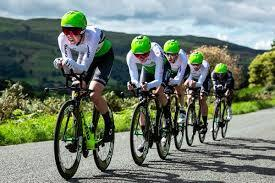

In [ ]:
print(get_image_caption(filename,model2))
display(Image(filename))